In [1]:
#### Checking against Jerry's stuff
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
target_file = '/glade/campaign/cesm/development/espwg/SMYLE-ERA5-L83/inputdata/cesm2_init/b.e21.SMYLE_ERA5_L83_IC.f09_g17.1997-11.01/1997-11-01/b.e21.SMYLE_ERA5_L83_IC.f09_g17.1997-11.01.cam.i.1997-11-01-00000.nc'
#hist_file = '/glade/derecho/scratch/juliob/archive/test3.02.2/atm/hist/test3.02.2.cam.h0.2000-01.nc'
X0 = xr.open_dataset(target_file ,  decode_times=False )

new_file = '/glade/derecho/scratch/juliob/era5-debugging/out-of-the-box//fv1x1/L83/ERA5_x_fv1x1_L83_rgC1_WO.1997-11-01-00000.nc'

X1 = xr.open_dataset(new_file)


In [3]:

te0=X0.T.values
te1=X1.T.values


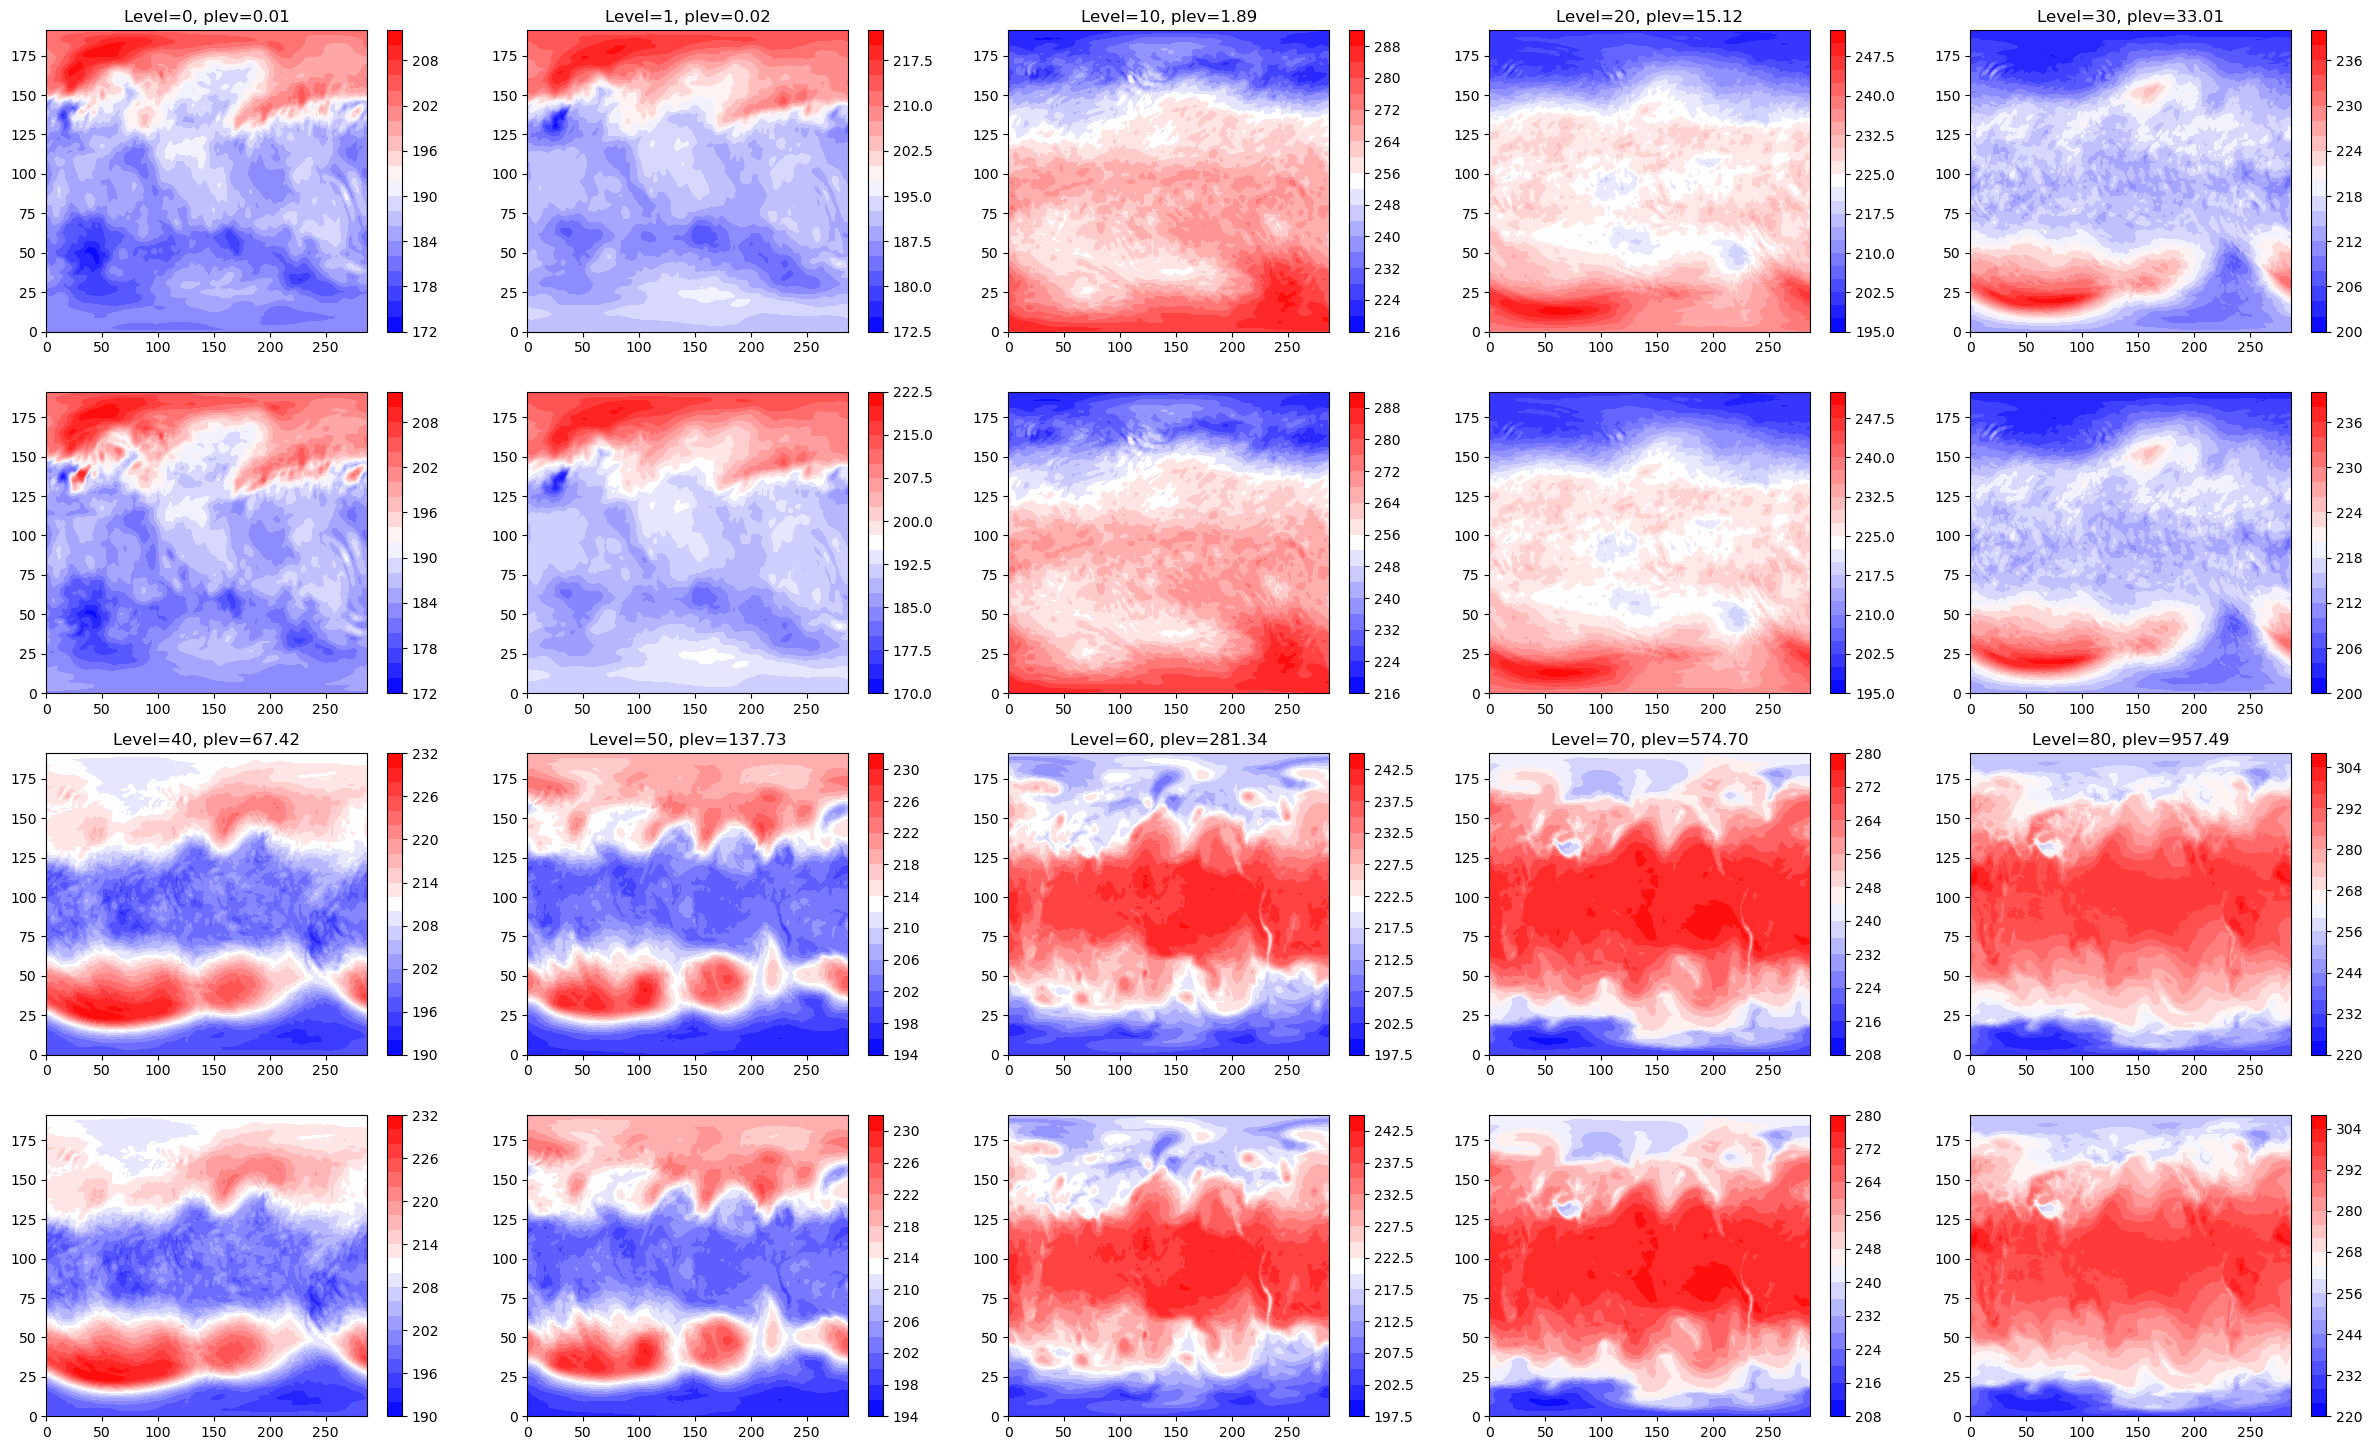

In [4]:
z=0
levs=21 #np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(4, 5, figsize=(30, 18))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,20,30,40,50,60,70,80]
i=0
for z in zees:
    co = ax[i].contourf( te0[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    cu = ax[i+5].contourf( te1[0,z,:,:]  , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, plev={X0.lev[z].values:0.2f}' )
    cb = plt.colorbar( co )
    cb2 = plt.colorbar( cu )
    if i==4:
        i=i+5+1
    else:
        i=i+1

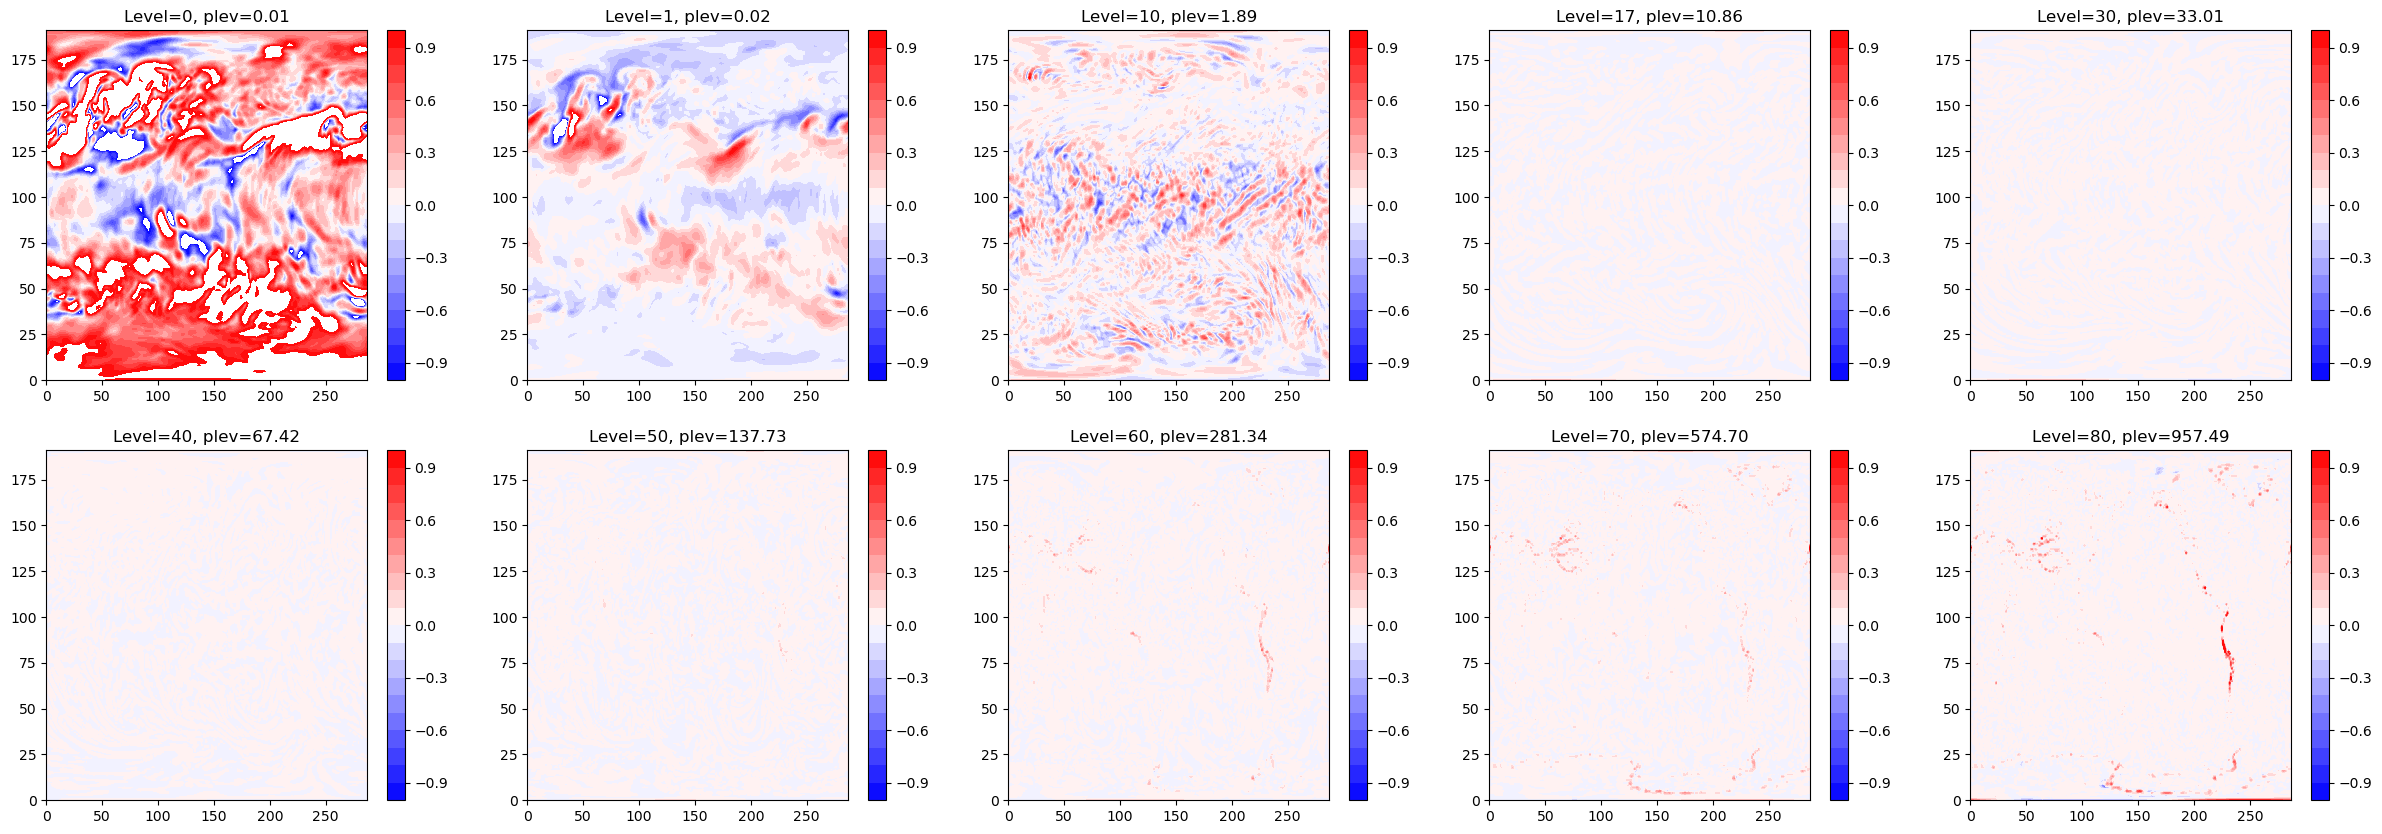

In [5]:
z=0
levs=1.0*np.linspace( -1,1,num=21) 

fig, ax = plt.subplots(2, 5, figsize=(30, 10))

# Flatten axs to easily access each subplot by index
ax = ax.flatten()

zees=[0,1,10,17,30,40,50,60,70,80]
i=0
for z in zees:
    co = ax[i].contourf( te1[0,z,:,:] - te0[0,z,:,:] , cmap='bwr'  ,levels=levs )
    ax[i].set_title( f'Level={str( z )}, plev={X0.lev[z].values:0.2f}' )
    cb = plt.colorbar( co )
    i=i+1

In [6]:
nt,nz,ny,nx=np.shape( te0 )

diff=np.zeros( nz )

for z in np.arange( nz ):
    diff[z] = np.average(  np.average(  (te1[0,z,:,:] - te0[0,z,:,:] )**2 , axis=1) , axis=0 ) 

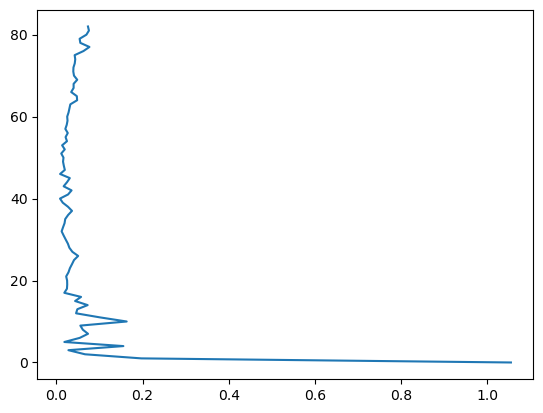

In [7]:
plt.plot( np.sqrt(diff)  , np.arange( nz) ) #X0.lev )

In [8]:
X0

<xarray.Dataset> Size: 74MB
Dimensions:  (time: 1, scalar: 1, lev: 83, ilev: 84, lat: 192, lon: 288,
              slat: 191, slon: 288)
Coordinates:
  * time     (time) float64 8B 1.746e+04
  * lev      (lev) float64 664B 0.008129 0.01833 0.0348 ... 957.5 976.3 992.6
  * ilev     (ilev) float64 672B 0.004256 0.012 0.02466 ... 967.5 985.1 1e+03
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat     (slat) float64 2kB -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon     (slon) float64 2kB -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: scalar
Data variables: (12/24)
    ndbase   (scalar) int32 4B ...
    nsbase   (scalar) int32 4B ...
    nbdate   (scalar) int32 4B ...
    nbsec    (scalar) int32 4B ...
    ndcur    (time) float64 8B ...
    nscur    (time) float64 8B ...
    ...       ...
    US       (time, lev, slat, lon) float32 18MB ...
    VS       (time, lev, lat, slon) float32 18MB ...
    T        (time, lev, lat, lon) float32 18MB 182.2 182.2 ... 256.5 256.5
    Q        (time, lev, lat, lon) float32 18MB ...
    PS       (time, lat, lon) float32 221kB ...
    PHIS     (time, lat, lon) float32 221kB ...
Attributes: (12/22)
    Conventions:            NCAR-CSM
    Description:            Re-gridded CAM Initial Conditions from the follow...
    source1:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source2:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source3:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    source4:                /glade/scratch/islas/SMYLE_ERA5_IC/ERA5/input/199...
    ...                     ...
    ps_adjust:              True; Adjust Ps per ECMWF algorithm
    q_adjust:               True; Eliminate super-saturation
    interp_log_ps:          True; Interpolate ln(Ps) rather than Ps
    OriginalFile:           ERA5_0.9x1.25_L83.cam2.i.1997-11-01-00000.nc
    history:                Thu Jan 27 21:06:25 2022: ncatted -a OriginalFile...
    NCO:                    netCDF Operators version 4.9.5 (Homepage = http:/...

In [9]:
era5dir = "/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/"

year,month,day,hour0 = 1997,11,1,0

monStr=str( year ).zfill(4)+str(month).zfill(2)

hour1=hour0+5
ymdh0=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour0).zfill(2)
ymdh1=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour1).zfill(2)
ymdh=ymdh0+'_'+ymdh1


wrkdir=era5dir+monStr+"/"
#Define all file names for later use in dask function
#-----------------------------------------------------
spfile= wrkdir + 'e5.oper.an.ml.128_134_sp.regn320sc.'+ymdh+'.nc'
tfile = wrkdir + 'e5.oper.an.ml.0_5_0_0_0_t.regn320sc.'+ymdh+'.nc'
qfile = wrkdir + 'e5.oper.an.ml.0_5_0_1_0_q.regn320sc.'+ymdh+'.nc'
ufile = wrkdir + 'e5.oper.an.ml.0_5_0_2_2_u.regn320uv.'+ymdh+'.nc'
vfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_3_v.regn320uv.'+ymdh+'.nc'
wfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_8_w.regn320sc.'+ymdh+'.nc'

T_ERA   = xr.open_mfdataset( tfile , data_vars='different', coords='different')



In [10]:
print(sys.path)

['/glade/u/apps/opt/conda/envs/npl-2025a/lib/python312.zip', '/glade/u/apps/opt/conda/envs/npl-2025a/lib/python3.12', '/glade/u/apps/opt/conda/envs/npl-2025a/lib/python3.12/lib-dynload', '', '/glade/u/apps/opt/conda/envs/npl-2025a/lib/python3.12/site-packages']


In [12]:

from Utils import GridUtils as GrU


ImportError: attempted relative import with no known parent package

In [ ]:
workdir_ = '/glade/work/juliob'
if ( workdir_ not in sys.path ):
    sys.path.append(workdir_)
    print( f" a path to {workdir_} added in {__name__} ")


from PyRegridding.Drivers import RegridField as RgF

############################
# Initialize dict for regridding
############################
RgObs={}

RegridObj = GrU.regrid_object_lib(RgOb=RgObs, src='ERA5', dst='fv1x1', RegridMethod='CONSERVE' )
